# Making LRM for Multiple features
After implementing some Univariate LRMS, it's time to move on to multiple variables.


This time, too I am somewhat motivated. (Also have exams in 3 days, lol.)
Plus, this time I have basic knowledge and code of tomorrow already.

Let's start with importing some modules.

In [1]:
from sklearn.datasets import make_sparse_uncorrelated

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from matplotlib import style
style.use("ggplot")

### Generating a dataset

Like yesterday, I am generating some dataset, that is sparse and uncorrelated.

It generates a number of samples with single output.

This time I select all the features (starting with minimum of 4).


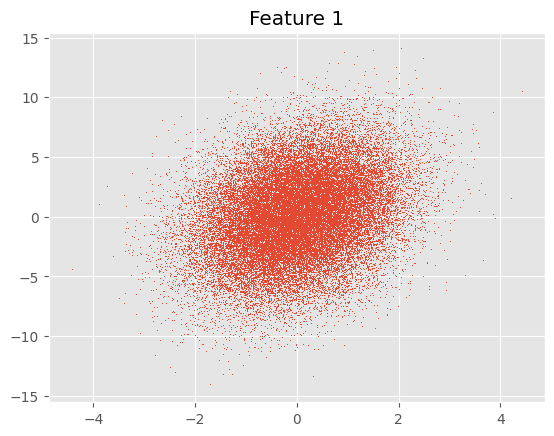

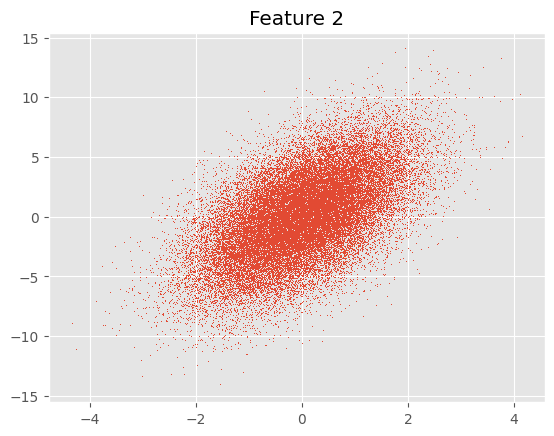

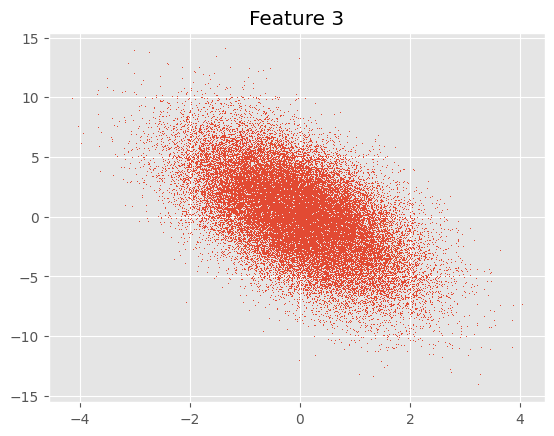

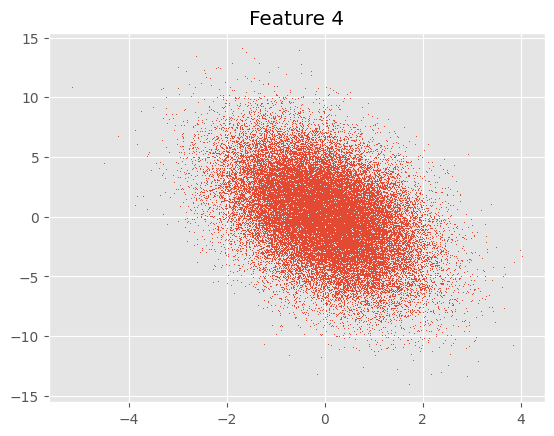

array([[[ 0.01191644],
        [-1.80742377],
        [-1.16675616],
        [-0.36504654]],

       [[ 0.25577666],
        [ 0.11381689],
        [-1.06588043],
        [-0.53300974]],

       [[-1.21645171],
        [ 0.71087334],
        [-0.95919152],
        [-2.27583997]],

       ...,

       [[-0.85457062],
        [ 0.60027177],
        [-0.52413931],
        [-0.22105718]],

       [[-0.25272344],
        [ 0.1854497 ],
        [ 0.29063486],
        [ 0.80520238]],

       [[-0.15255123],
        [ 0.15099536],
        [-0.29821522],
        [ 0.53912385]]])

In [23]:
# Generate dataset

# can't take less than 4 features
num_features = 4
num_samples = 40000
X, y = make_sparse_uncorrelated(n_samples=num_samples, n_features= num_features)

X = X.reshape(n_samples, -1, 1)

plt.cla()
# plt.plot(x, y, 'x')
for i in range(num_features):
    plt.plot(X[:,i], y, ',') # ',' for pixel plotting
    plt.title(f"Feature {i+1}")
    plt.show()

X


# my_data

# The ML model class:

The class below implements the linear regression model for a multiple input variable (multiple linear regression) 

i.e. sort of 

$ y = w_1 x_1 + w_2 x_2 + w_3 x_3 + .... + w_n x_n + b $

Now, all those weights could be vectorized and so could be the x's.

So:\
$X = [x_1, x_2, ..., x_n]$\
$W = [w_1, w_2, ..., 2_n]$

Thus, the model simplifies as:
$ y = \vec{W} \cdot \vec{X} + b $

$X$  is the input vector with all the features.\
$W$  is the weight vector.\
$b$  is the bias.

But somehow, in python we have to dot X with W because there could be multiple examples of X's



<!-- Contains the functions to 
1. apply the model, 
2. calcualte gradient for least squared error
3. calculate gradient for l1_error
3. see the error value (least squared error and l1)
4. l1 regularization (l2 error with l1 regularization on parameters) -->



In [28]:

class multiple_linear_regression_model:
    def __init__(self, n_features: int):
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()
    
    def apply(self, x:float) -> float:
        y = np.dot(self.weights, x) + self.bias
        return y

    # def least_squared_error(self, x:float, y:float) -> float:
    #     lenx = len(x)
    #     assert(lenx == len(y))
    #     residue = self.apply(x) - y
    #     error = sum(residue ** 2) / (2 * lenx)
    #     return error
    
    # def lse_gradient(self, x:float , y:float) -> float:
    #     lenx = len(x)
    #     assert(lenx == len(y))
    #     residue = self.apply(x) - y
    #     grada_list = residue / lenx
    #     gradb_list = residue / lenx * x
    #     grada = sum(grada_list)
    #     gradb = sum(gradb_list)
    #     return np.array([grada, gradb])
    
    # def l1_error_gradient(self, x:float, y:float) -> float:
    #     lenx = len(x)
    #     assert(lenx == len(y))
    #     residue = self.apply(x) - y
    #     sign = np.sign(residue)
    #     grada_list = sign / (lenx * 2)
    #     gradb_list = sign / (lenx * 2) * x
    #     grada = sum(grada_list)
    #     gradb = sum(gradb_list)
    #     return np.array([grada, gradb])
    
    # def l1_error(self, x: float, y:float) -> float:
    #     lenx = len(x)
    #     assert(lenx == len(y))
    #     residue = self.apply(x) - y
    #     abs(residue)
    #     return sum(residue) / (2 * lenx)

    # def lse_with_l1_regularization_grad(self, x:float, y:float) -> float:
    #     lenx = len(x)
    #     # assert(lenx == len(y)) # Already will be checked in lse grad
    #     prev_grad = self.lse_gradient(x, y)
    #     regularization = np.sign(self.parameters) / (2 * lenx)
    #     return prev_grad - regularization
    
    # def lse_with_l1_regularization_error(self, x:float, y:float) -> float:
    #     lenx = len(x)
    #     # assert(lenx == len(y))
    #     lse_error = self.least_squared_error(x, y)
    #     error = lse_error + sum(abs(self.parameters))/2
    #     return error



    # # def gradient_for_other_error_function(self, x:float, y:float) -> float:
    # #     could have made something, will do someday, lol
    
    
    # def get_plot_points(self, X):
    #     X = np.array([min(X), max(X)])
    #     Y = self.apply(X)
    #     return X, Y
    

a = multiple_linear_regression_model(num_features)

# a.apply(x)
print(X.shape)
print(a.apply(X).shape)

# a.parameters
# a.lse_gradient(x, y)
# linex, liney = a.get_plot_points(x)
# plt.cla()
# plt.plot(linex, liney)
# plt.plot(x, y, ',')
# plt.show()

(40000, 4, 1)
(40000, 1)


### Visualization part (the most interesting part)
Now I want to visualize linear regression happening

The linear regression's gradient descent happens as:
1. I calcualte the gradient of the loss function.
2. I use the gradient and the learning rate to improve the model.
3. Repeat step 1 and 2 multiple times until I get very good at predection

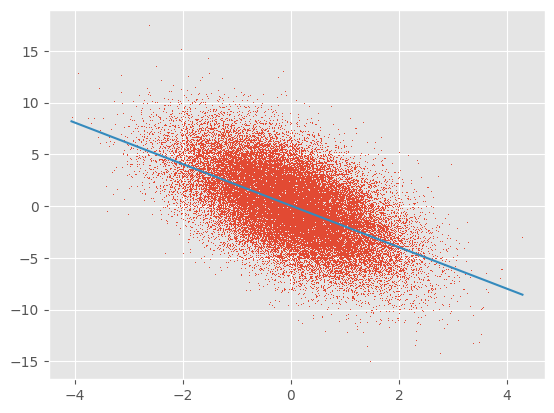

Total error = 4.133456390055839, parameters = [ 0.0380517 -2.0069069]


<Figure size 640x480 with 0 Axes>

In [30]:
# Visualizing l2 (lse) error's grad descent.

from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 2, it will diverge slowly
# If I keep 5, it will explode violently
# If I keep 1, it will converge very fast
# If I keep .1, it will converge slowly
learning_rate = .1
plt.ion()
for i in range(100):
    gradient = my_model.lse_gradient(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.least_squared_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()


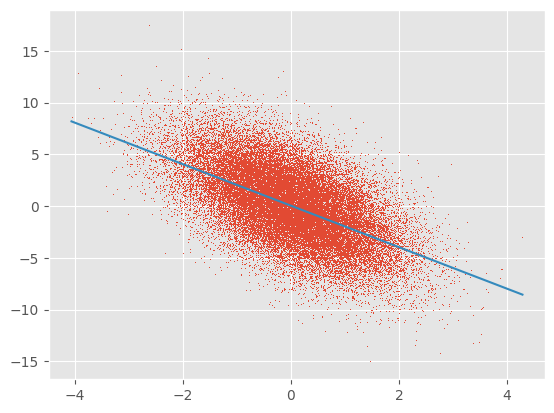

Total error = -inf, parameters = [ 0.03768869 -2.00564913]


<Figure size 640x480 with 0 Axes>

In [32]:
# Visualizing l1_error's gradient descent
from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 10, it will converge very fast
# If I keep 20 or more, it will not converge
# If I keep 1 or low, it will converge slowly
learning_rate = 1
plt.ion()
for i in range(100):
    gradient = my_model.l1_error_gradient(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.l1_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()

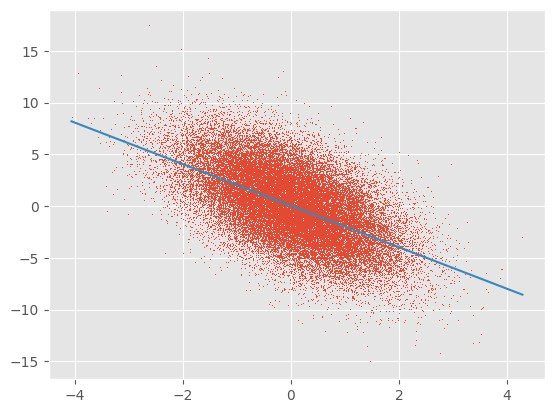

Total error = 5.15596836624061, parameters = [ 0.03804137 -2.00698259]


<Figure size 640x480 with 0 Axes>

In [49]:
# Visualizing lse error with l1 reg's gradient descent
from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 5, it will explode
# If I keep learning rate 2, it will oscillate in some values, without converging
# If I keep learning rate 1, it will converge instantly
# If I keep learning rate 0.1 or below converge slowly
learning_rate = 1
plt.ion()
for i in range(50):
    gradient = my_model.lse_with_l1_regularization_grad(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.lse_with_l1_regularization_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()